<a href="https://colab.research.google.com/github/shanerodricks/CPSC230_assignment1/blob/main/Copy_of_HW1_SP22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW1

GENERAL INSTRUCTIONS:

- For all ggplots, make sure you make changes so that the data viz is effective, clear, and does not contain distracting elements, graphs will be graded both on correctness (did you plot the right hting) as well as on effectiveness (does this graph thoughtfully demonstrate the principles we learned in our data viz lectures).
- CLEARLY mark where you are answering each question (see [here](https://github.com/cmparlettpelleriti/CPSC392ParlettPelleriti/blob/master/Extras/HW1_Format%20Example.ipynb) for an example format).
- Show all code necessary for the analysis, but remove superfluous code

---

Using the dataset linked [here](https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/reactionTime.csv), <strong>build a linear regression model to predict *reaction time* from a lab based cognitive task (reaction time refers to the amount of time it takes a person to react after seeing a stimuli on a screen) based on all the other variables.</strong>


### Variables
- age: age in years
- boredom_rating: a scale of 0-100 with 0 being completely not bored, 100 is completely bored
- risk_propensity: a scale of 0-28 where higher scored indicate a person is more likely to take risks
- height: height in cm
- left_handed: 0 if the person is right handed, 1 if they are left handed
- reaction_time: reaction time in ms


### Instructions
<ul> 
<li> a) use an 80/20 train test split for model validation and make sure you z score your continuous/interval variables ONLY 
<li> b) check the linearity assumption for your continuous variables using ggplot (using all the training data). <strong>Discuss</strong> in detail what you are checking for and specifically what you see for this model (regardless of the results, continue building the linear regression model, as we do not have any other alternatives yet). 
<li> c) check the assumption of homoscedasticity by plotting predicted reaction times and residuals using ggplot (using the training set). <strong>Discuss</strong> in detail what you are checking for and what patterns you see specifically for this model.
<li> d) plot the actual vs. predicted reaction times (for both train an test set separately), as well as print out the mean <em>absolute</em> error for both <em>train</em> and <em>test</em> and $R^2$ for your model for both <em>train</em> and <em>test</em>. <strong>Discuss</strong> how well your model did based on these metrics, and how can you tell.
<li> e) is your model overfit? <strong>Discuss</strong> in detail how you can tell.
<li> f) use ggplot to make a bar chart showing the coefficient values (x should be each coef name, the height of each bar should be the value of the coefficient). DO NOT include the intercept in this plot. Briefly <strong>discuss</strong> the impact of each variable on reaction time.
</ul> 

Feel free to add cells to this notebook in order to execute the code, but for parts b,c, and d, make sure you put the discussion part in a *Markdown* cell, do not use code comments to answer. 

In [ ]:
# import necessary packages
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *

from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #model evaluation
from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.linear_model import LinearRegression # Linear Regression Model 
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv
from sklearn.model_selection import cross_val_score # cross validation metrics
from sklearn.model_selection import cross_val_predict # cross validation metrics

import time
%matplotlib inline

In [ ]:
# code
DS = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/reactionTime.csv")
DS.head()

,age,boredom_rating,risk_propensity,height,left_handed,reaction_time
0,34,78.87,10.53,146.79,0,900.949930
1,38,4.84,14.64,169.44,0,900.668926
2,38,23.52,14.17,167.76,1,901.703988
3,27,45.65,15.98,171.15,0,899.406904
4,34,0.88,10.58,158.15,0,899.728326


# **a) use an 80/20 train test split for model validation and make sure you z score your continuous/interval variables ONLY**


In [ ]:
#Train-Test Split
predictors = ["left_handed"]
continuous_predictors = ["age", "boredom_rating", "risk_propensity","height"]
X_train, X_test, y_train, y_test = train_test_split(DS[continuous_predictors], DS["reaction_time"], test_size=0.2)

#Z-Score
zscore = StandardScaler()
zscore.fit(X_train)

Xz_train = zscore.transform(X_train)
Xz_test = zscore.transform(X_test)



#Model
model = LinearRegression()
model.fit(Xz_train, y_train)

#Predict
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


# **b) check the linearity assumption for your continuous variables using ggplot (using all the training data). Discuss in detail what you are checking for and specifically what you see for this model (regardless of the results, continue building the linear regression model, as we do not have any other alternatives yet).**

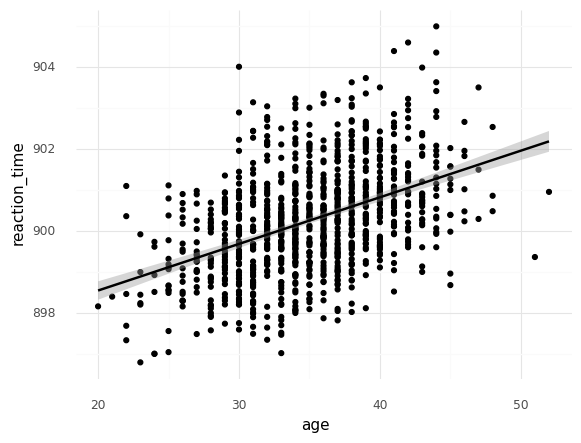

<ggplot: (8761731907833)>

In [ ]:
(ggplot(DS, aes(x="age", y="reaction_time")) + geom_point() + theme_minimal() + geom_smooth())

*When analyzing this model, I am trying to look for a linear relationship between age and reaction time. There does not necessarly look like there is a linear relationship between the two variables. The data points are centered densely between the age 30 and 40. *

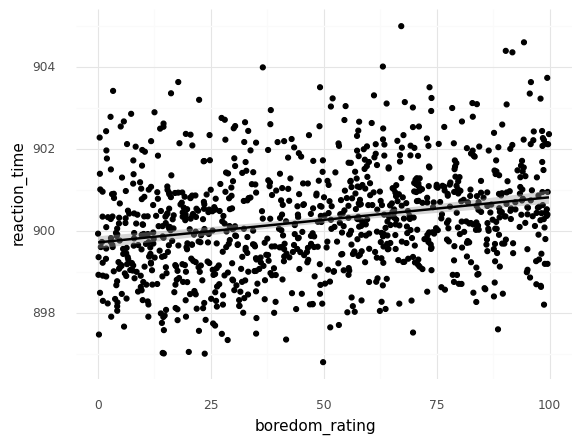

<ggplot: (8761731907749)>

In [ ]:
(ggplot(DS, aes(x="boredom_rating", y="reaction_time")) + geom_point() + theme_minimal() + geom_smooth())

*When analyzing this graph, I am trying to analyze a relationship between boredom rating and reaction time. It shows a slightly positive linear relationship between the two variables. *

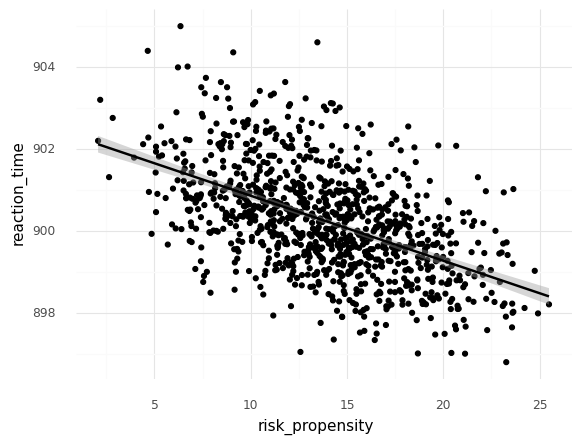

<ggplot: (8761731860057)>

In [ ]:
(ggplot(DS, aes(x="risk_propensity", y="reaction_time")) + geom_point() + theme_minimal() + geom_smooth())

*When risk propensity is compared to reaction time there seems to be a negative linear relationship. As the risk propensity increases, the reaction time decreases.*

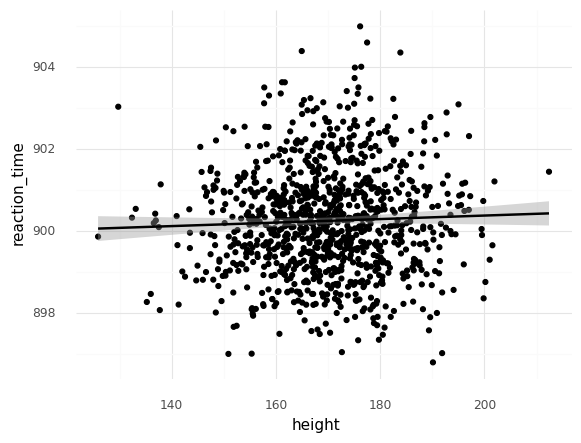

<ggplot: (8761732290093)>

In [ ]:
(ggplot(DS, aes(x="height", y="reaction_time")) + geom_point() + theme_minimal() + geom_smooth())

*When height is compared to reaction time, there doesn't necessarily seem to be a linear relationship. The data points are centered around the middle, but mostly seem to cluster between heights 160 and 180 cm.*

# **c) check the assumption of homoscedasticity by plotting predicted reaction times and residuals using ggplot (using the training set). Discuss in detail what you are checking for and what patterns you see specifically for this model.**

In [ ]:
#predictions
y_pred = model.predict(Xz_train)
homoscedascity = pd.DataFrame({"error": y_train - y_pred, "predicted": y_pred})
print(homoscedascity)

        error   predicted
320  2.639027  900.370898
291 -0.029616  900.841935
304  0.849339  899.895103
386  0.727591  899.995390
625 -1.454193  900.483591
..        ...         ...
618 -0.013480  899.125138
417 -0.875816  899.038329
375  1.565425  900.530324
400  2.529356  900.504247
263 -0.469711  900.072571

[800 rows x 2 columns]


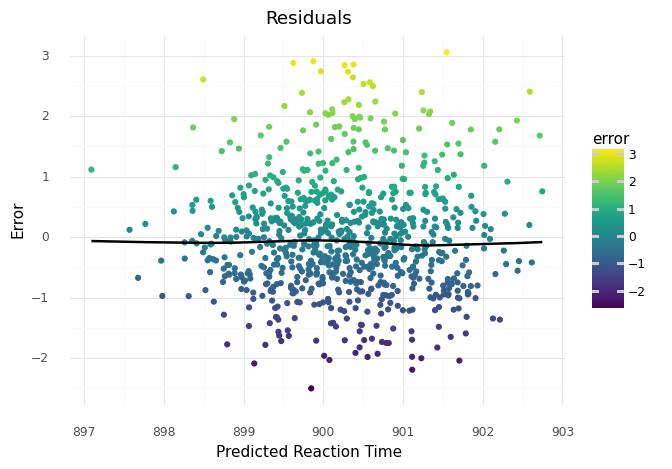

<ggplot: (8761732284965)>

In [ ]:
ggplot(homoscedascity, aes(x = "predicted", y = "error", color = "error")) + geom_point()+ geom_smooth() + labs(title = "Residuals", x = "Predicted Reaction Time", y = "Error") + theme_minimal()

This model seems to show homoscedascity as most of the errors have the same distance from the smoothing line and is distributed normally throughout. This graph specifically is looking for the error from the model (y_train - y_pred) plotted against the predicted reaction time provided by the model.

# **d) plot the actual vs. predicted reaction times (for both train an test set separately), as well as print out the mean absolute error for both train and test and  𝑅2  for your model for both train and test. Discuss how well your model did based on these metrics, and how can you tell.**

In [ ]:
true_vs_pred = pd.DataFrame({"predict": y_pred_test, "true_V": y_test})
true_vs_pred.head()

,predict,true_V
796,922.036249,899.896974
299,949.447217,901.679840
59,934.442927,900.730205
528,915.648004,898.904731
747,940.874935,900.156994


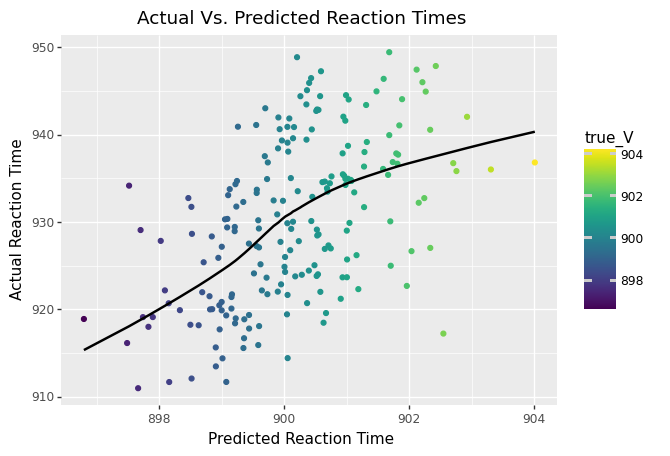

<ggplot: (8761732222961)>

In [ ]:
ggplot(true_vs_pred, aes(x = "true_V", y = "predict", color = "true_V")) + geom_point() + geom_smooth()+ labs(title = "Actual Vs. Predicted Reaction Times", x = "Predicted Reaction Time", y = "Actual Reaction Time")

In [ ]:
#testing R2
model.score(Xz_test, y_test)

0.6761671993792799

In [ ]:
#training R2
model.score(Xz_train, y_train)

0.7054913592829903

In [ ]:
#mae for train set
mae(y_test, model.predict(Xz_test))

0.5951199888527237

In [ ]:
#mae for test set
mae(y_train, model.predict(Xz_train))

0.5658467132094239

*The Mean Absolute Error does not vary a lot between training and testing set. In additon, both MAE's are relatively low, meaning that the model is effective for predicting reaction time. The R^2 is greater than 0.5, meaning the model is decently good at fitting the data.*

# **e) is your model overfit? Discuss in detail how you can tell.**

The training error vs testing error is very similar. When the training error is significantly better than the testing error, this indicates overfitting. This does not happen with the model built for predicting reaction time. In addition, from viewing the graph, it does not show signs of overfitting.

# **f) use ggplot to make a bar chart showing the coefficient values (x should be each coef name, the height of each bar should be the value of the coefficient). DO NOT include the intercept in this plot. Briefly discuss the impact of each variable on reaction time.**

      coefficients     value
0              age  0.550656
1   boredom_rating  0.277038
2  risk_propensity -0.661368
3           height  0.039705


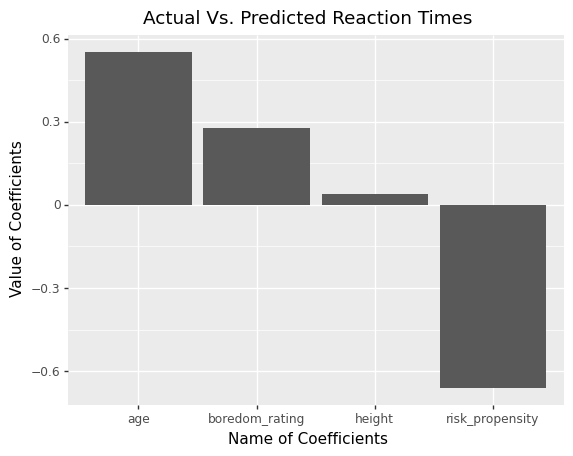

<ggplot: (8761731464797)>

In [ ]:
coef = pd.DataFrame({"coefficients": continuous_predictors, "value": model.coef_})
print(coef)
ggplot(coef, aes(x = "coefficients", y = "value")) + geom_bar(stat = "identity") + labs(title = "Actual Vs. Predicted Reaction Times", x = "Name of Coefficients", y = "Value of Coefficients")

The age variable shows that the older a person is, the slower their reaction time is as well. This makes sense because the older you get, the slower your reaction time is. Boredome rating shows that if you are really bored (high boredom rating), your reaction time is slow as well. It is about half as impactful as age. Height is almost completely insignificant to reaction speed (almost 0). Risk propensity shows that higher risk propensity slows down reaction speed.